MainProcess


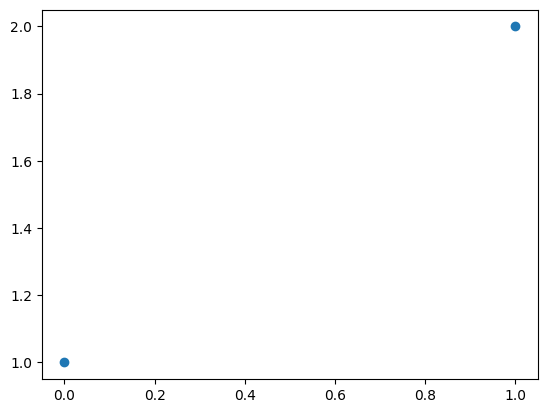

In [1]:
import sys
sys.path.append('d:/flagellar/code/core')
sys.path.append('/flagellar/code/core')
sys.path.append('/kaggle/input/my-flg-library/')
import flg_support as fls
import importlib
import numpy as np
import flg_diagnostics
import flg_numerics
import matplotlib.pyplot as plt
import glob
import copy
import flg_preprocess
import os
import flg_model
fls.profiling=False
plt.scatter([0,1],[1,2])

In [2]:
N_test_negative = 50
N_test_positive = 300
all_data = fls.load_all_train_data() + fls.load_all_extra_data()
np.random.default_rng(seed=0).shuffle(all_data)
n_motors = np.array([len(d.labels) for d in all_data])
inds_zero = np.argwhere(n_motors==0)[:N_test_negative,0]
inds_one = np.argwhere(n_motors==1)[:N_test_positive,0]
inds_test = np.concatenate((inds_zero,inds_one))
inds_train = np.setdiff1d(np.arange(len(n_motors)), inds_test)
train_data = []
for i in inds_train:
    train_data.append(all_data[i])
test_data = []
for i in inds_test:
    test_data.append(all_data[i])        
print(len(train_data), len(test_data))

1581 350


In [ ]:
highest_false_score = []
real_score = []
data_list = []
for i_type in range(4):
    model = flg_model.ThreeStepModelLabelBased()   
    #model.step1Labels.n_epochs = 2
    #m.step2Motors.distance_threshold = 10.
    if i_type == 0:
        # no negative labels
        model.step1Labels.negative_label_threshold = 1.
        model.step1Labels.negative_slice_ratio = 0.1             
    elif i_type==1:
        # baseline
        pass    
    model.step1Labels.relative_confidence_threshold = 0.01
    model.run_in_parallel = False   
    model_file = fls.temp_dir + 'model_comp_' + str(i_type) + '.pickle'
    if not os.path.isfile(model_file):
        model.train(train_data, test_data)
        fls.dill_save(model_file, model)
    model = fls.dill_load(model_file)
    #model = fls.dill_load(fls.temp_dir + 'model_' + str(i_type) + '.pickle')
    data_file = fls.temp_dir + 'data_comp_' + str(i_type) + '.pickle'
    if not os.path.isfile(data_file):        
        inferred_data = model.infer(test_data)
        fls.dill_save(data_file, inferred_data)
    inferred_data = fls.dill_load(data_file)    
    for d in inferred_data:
        d.labels_unfiltered = d.labels_unfiltered2
    fls.mark_tf_pn(inferred_data, test_data)
    data_list.append(inferred_data)
    this_highest_false_score = []
    this_real_score = []
    for i,r in zip(inferred_data, test_data):
        false_positives = i.labels_unfiltered[i.labels_unfiltered['tf_pn']==1.]
        if len(false_positives)>0:
            this_highest_false_score.append(np.max(false_positives['confidence']))
        else:
            this_highest_false_score.append(0)
        if len(r.labels)>0:
            true_positives = i.labels_unfiltered[i.labels_unfiltered['tf_pn']==0.]
            if len(true_positives)>0:
                this_real_score.append(np.max(true_positives['confidence']))
            else:
                this_real_score.append(0)
    highest_false_score.append(this_highest_false_score)
    real_score.append(this_real_score)


CompletedProcess(args=['pip', 'uninstall', '-y', 'albumentations'], returncode=0)


  0%|          | 0/531 [00:00<?, ?it/s]

Clearing pytorch


/opt/conda/lib/python3.11/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


  0%|          | 0/113 [00:00<?, ?it/s]


Preprocessing Complete:
- Training data: 531 tomograms, 0 motors, 0 slices
- Validation data: 113 tomograms, 0 motors, 0 slices
- Dataset directory: /flagellar/temp//yolo_dataset/
- YAML configuration: /flagellar/temp//yolo_dataset/dataset.yaml

Ready for YOLO training!
Starting YOLO training process...
Created new YAML at /flagellar/temp/training.yaml
Using YAML file: /flagellar/temp/training.yaml
YAML contents:
names:
  0: motor
path: /flagellar/temp//yolo_dataset/
train: images/train
val: images/val


Starting YOLO training...
New https://pypi.org/project/ultralytics/8.3.127 available 😃 Update with 'pip install -U ultralytics'
WARNING ⚠️ 'crop_fraction' is deprecated and will be removed in in the future.
Ultralytics 8.3.126 🚀 Python-3.11.10 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=None, batch=12, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, cop

train: Scanning /flagellar/temp/yolo_dataset/labels/train... 2887 images, 262 backgrounds, 9 corrupt: 100%|██████████| 2887/2887 [00:01<00:00, 2404.00it/s]

train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0166.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0167.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0168.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0169.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0170.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0171.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/imag

train: New cache created: /flagellar/temp/yolo_dataset/labels/train.cache
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1543.4±938.6 MB/s, size: 85.3 KB)


val: Scanning /flagellar/temp/yolo_dataset/labels/val... 623 images, 56 backgrounds, 0 corrupt: 100%|██████████| 623/623 [00:00<00:00, 2599.50it/s]

val: New cache created: /flagellar/temp/yolo_dataset/labels/val.cache


Plotting labels to /flagellar/temp/yolo_weights/motor_detector/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 221 weight(decay=0.0), 228 weight(decay=0.00046875), 227 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /flagellar/temp/yolo_weights/motor_detector
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.76G      3.171      13.06      1.308         16        640: 100%|██████████| 240/240 [00:25<00:00,  9.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 15.66it/s]

                   all        623        567       0.42       0.46      0.359      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.09G      2.455      2.035      1.068         21        640: 100%|██████████| 240/240 [00:22<00:00, 10.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 16.46it/s]

                   all        623        567      0.526      0.642      0.529      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.09G      2.295      1.824      1.035         21        640: 100%|██████████| 240/240 [00:21<00:00, 11.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 16.69it/s]

                   all        623        567      0.717      0.715      0.735      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.09G      2.218      1.747      1.026         19        640: 100%|██████████| 240/240 [00:20<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 16.49it/s]

                   all        623        567      0.882      0.778      0.873      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.09G      2.119      1.627      1.008         14        640: 100%|██████████| 240/240 [00:21<00:00, 11.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 16.49it/s]

                   all        623        567      0.867      0.802      0.893      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.09G      2.069      1.522      0.991         16        640: 100%|██████████| 240/240 [00:21<00:00, 11.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 16.73it/s]

                   all        623        567      0.856      0.804      0.881      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.09G      2.044      1.521     0.9861         18        640: 100%|██████████| 240/240 [00:21<00:00, 11.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 16.56it/s]

                   all        623        567      0.806      0.818      0.901       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.09G      1.975       1.44      0.977         20        640: 100%|██████████| 240/240 [00:21<00:00, 11.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 16.61it/s]

                   all        623        567      0.892      0.886      0.923       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.09G       1.95      1.434     0.9701         22        640: 100%|██████████| 240/240 [00:21<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 16.57it/s]

                   all        623        567      0.926      0.857      0.931      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.09G      1.904      1.297     0.9622         11        640: 100%|██████████| 240/240 [00:21<00:00, 11.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 16.63it/s]

                   all        623        567      0.912      0.878      0.933      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.09G      1.869      1.267     0.9498         13        640: 100%|██████████| 240/240 [00:21<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 16.55it/s]

                   all        623        567      0.929      0.892      0.951      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.09G      1.792       1.26     0.9433         22        640: 100%|██████████| 240/240 [00:21<00:00, 11.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 16.90it/s]

                   all        623        567       0.92      0.855      0.919      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.09G      1.794      1.259     0.9398         17        640: 100%|██████████| 240/240 [00:21<00:00, 11.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 16.60it/s]

                   all        623        567      0.921      0.861      0.927      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.09G      1.776      1.235     0.9362         10        640: 100%|██████████| 240/240 [00:21<00:00, 10.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 16.69it/s]

                   all        623        567      0.955      0.891      0.952      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.09G      1.734      1.191     0.9268         13        640: 100%|██████████| 240/240 [00:21<00:00, 11.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 16.45it/s]

                   all        623        567      0.929      0.906      0.951      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.09G      1.701      1.198     0.9314         10        640: 100%|██████████| 240/240 [00:21<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 16.66it/s]

                   all        623        567      0.956      0.924       0.97      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.09G       1.68      1.103     0.9178         19        640: 100%|██████████| 240/240 [00:21<00:00, 11.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 16.44it/s]

                   all        623        567      0.947      0.937      0.976      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.09G       1.68      1.102     0.9171         15        640: 100%|██████████| 240/240 [00:21<00:00, 11.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 16.63it/s]

                   all        623        567      0.934      0.921      0.962      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.09G      1.642      1.078     0.9111         21        640: 100%|██████████| 240/240 [00:21<00:00, 11.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 16.81it/s]

                   all        623        567      0.947      0.912      0.958       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.09G      1.647      1.053     0.9118         10        640: 100%|██████████| 240/240 [00:21<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 16.86it/s]

                   all        623        567       0.98      0.937      0.969       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.09G      1.622      1.062     0.9085         15        640: 100%|██████████| 240/240 [00:21<00:00, 11.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 15.98it/s]

                   all        623        567      0.968      0.917      0.967      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.09G      1.583      1.037     0.9056         16        640: 100%|██████████| 240/240 [00:21<00:00, 11.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 16.45it/s]

                   all        623        567      0.963      0.921      0.967      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.09G      1.574      1.035     0.9002         15        640: 100%|██████████| 240/240 [00:21<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 16.61it/s]

                   all        623        567      0.954      0.924      0.975      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.09G      1.534      1.012     0.9019         13        640: 100%|██████████| 240/240 [00:21<00:00, 11.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 16.86it/s]

                   all        623        567       0.97      0.931      0.975      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.09G      1.538     0.9889     0.8988         12        640: 100%|██████████| 240/240 [00:21<00:00, 11.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 16.34it/s]

                   all        623        567      0.935      0.909      0.961      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.09G      1.492     0.9526      0.888         16        640: 100%|██████████| 240/240 [00:21<00:00, 11.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 16.23it/s]

                   all        623        567      0.957      0.907      0.959      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.09G      1.484     0.9286     0.8884         17        640: 100%|██████████| 240/240 [00:21<00:00, 11.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 16.40it/s]

                   all        623        567      0.948      0.942      0.963      0.525
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 17, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



27 epochs completed in 0.179 hours.
Optimizer stripped from /flagellar/temp/yolo_weights/motor_detector/weights/last.pt, 15.2MB
Optimizer stripped from /flagellar/temp/yolo_weights/motor_detector/weights/best.pt, 15.2MB

Validating /flagellar/temp/yolo_weights/motor_detector/weights/best.pt...
Ultralytics 8.3.126 🚀 Python-3.11.10 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
YOLOv9s summary (fused): 197 layers, 7,167,475 parameters, 0 gradients, 26.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.36it/s]


                   all        623        567      0.878      0.891      0.935      0.504
Speed: 0.1ms preprocess, 2.6ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to /flagellar/temp/yolo_weights/motor_detector

Training complete!
Clearing cupy
YOLOv9s summary (fused): 197 layers, 7,167,475 parameters, 0 gradients, 26.7 GFLOPs
Processing tomogram tomo_512f98 (1/1)
Processing 800 out of 800 slices (CONCENTRATION=1)
FINAL
        z    y    x  confidence
0     596  441  294    0.640625
1     488  345  579    0.331055
2     121  503  502    0.303955
3     467  737  760    0.302490
4     653  426  736    0.281494
...   ...  ...  ...         ...
1214  536  382  528    0.006439
1215  536  386  540    0.006439
1216  631  442  438    0.006439
1217  195  303  863    0.006413
1218  597  460  794    0.006413

[1219 rows x 4 columns]

Clearing pytorch
Clearing cupy
Processing tomogram tomo_d0d9b6 (1/1)
Processing 800 out of 800 slices (CONCENTRATION=1)
FINAL
       z    y    x 

CompletedProcess(args=['pip', 'uninstall', '-y', 'albumentations'], returncode=0)


  0%|          | 0/531 [00:00<?, ?it/s]

Clearing pytorch


  0%|          | 0/113 [00:00<?, ?it/s]


Preprocessing Complete:
- Training data: 531 tomograms, 0 motors, 0 slices
- Validation data: 113 tomograms, 0 motors, 0 slices
- Dataset directory: /flagellar/temp//yolo_dataset/
- YAML configuration: /flagellar/temp//yolo_dataset/dataset.yaml

Ready for YOLO training!
Starting YOLO training process...
Created new YAML at /flagellar/temp/training.yaml
Using YAML file: /flagellar/temp/training.yaml
YAML contents:
names:
  0: motor
path: /flagellar/temp//yolo_dataset/
train: images/train
val: images/val


Starting YOLO training...
New https://pypi.org/project/ultralytics/8.3.127 available 😃 Update with 'pip install -U ultralytics'
WARNING ⚠️ 'crop_fraction' is deprecated and will be removed in in the future.
Ultralytics 8.3.126 🚀 Python-3.11.10 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=None, batch=12, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, cop

train: Scanning /flagellar/temp/yolo_dataset/labels/train... 5231 images, 2604 backgrounds, 9 corrupt: 100%|██████████| 5231/5231 [00:01<00:00, 2713.48it/s]

train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0166.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0167.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0168.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0169.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0170.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0171.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/imag

train: New cache created: /flagellar/temp/yolo_dataset/labels/train.cache
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1112.1±690.8 MB/s, size: 78.6 KB)


val: Scanning /flagellar/temp/yolo_dataset/labels/val... 1136 images, 568 backgrounds, 0 corrupt: 100%|██████████| 1136/1136 [00:00<00:00, 2517.21it/s]

val: New cache created: /flagellar/temp/yolo_dataset/labels/val.cache


Plotting labels to /flagellar/temp/yolo_weights/motor_detector/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 221 weight(decay=0.0), 228 weight(decay=0.00046875), 227 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /flagellar/temp/yolo_weights/motor_detector
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.83G      3.009      6.603      1.223          0        640: 100%|██████████| 436/436 [00:46<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:02<00:00, 18.08it/s]

                   all       1136        568      0.359      0.415       0.29     0.0836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.18G      2.518      2.343       1.08          1        640: 100%|██████████| 436/436 [00:41<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:02<00:00, 18.47it/s]

                   all       1136        568      0.429      0.569      0.451      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.18G      2.407      2.223      1.054          3        640: 100%|██████████| 436/436 [00:40<00:00, 10.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:02<00:00, 18.49it/s]

                   all       1136        568      0.637      0.685      0.634      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.18G      2.357      2.172       1.05          7        640:  32%|███▏      | 138/436 [00:12<00:26, 11.45it/s]

In [ ]:
for d in data_list:
    n_corr=0
    n_total=0
    for i,r in zip(d,test_data):
        if len(r.labels)>0:# and 'tom' in r.name:
            n_total+=1
            ind = np.argmax(i.labels_unfiltered['confidence'])
            if (i.labels_unfiltered['tf_pn'].tolist()[ind])==0.:
                n_corr += 1
    print(n_corr/n_total)
    #print(i.labels_unfiltered)

In [ ]:
i_baseline = 0; i_new = 1;

In [ ]:
plt.scatter(highest_false_score[i_baseline], highest_false_score[i_new])
plt.xlabel('Highest false score baseline')
plt.ylabel('Highest false score new')
plt.grid(True)
plt.axline((0,0),slope=1)

In [ ]:
plt.scatter(real_score[i_baseline], real_score[i_new])
plt.xlabel('True score baseline')
plt.ylabel('True score new')
plt.grid(True)
plt.axline((0,0),slope=1)

In [ ]:
xx=(np.argwhere(np.logical_and(np.array(real_score[i_baseline])>0., np.array(real_score[i_new])<0.4))).flatten()
xx

In [ ]:
#cur_id = 87
cur_id = 0
for ii in range(len(models[0].test_data[todo])):
    if len(models[0].test_data[todo][ii].labels)>0:     
        if cur_id in xx:
            print(models[0].test_data[todo][ii].name,ii,real_score[i_baseline][cur_id],real_score[i_new][cur_id])
        cur_id+=1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# flatten the two arrays into one to get global bin edges
all_scores = np.concatenate([highest_false_score[i_baseline], highest_false_score[i_new]])
# choose number of bins (e.g. 30) or compute automatically
bins = np.histogram_bin_edges(all_scores, bins=30)

plt.figure(figsize=(8, 5))
plt.hist(highest_false_score[i_baseline], bins=bins, cumulative=True, alpha=0.5, label='Original')
plt.hist(highest_false_score[i_new], bins=bins, cumulative=True, alpha=0.5, label='New')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Overlayed Histograms of Highest False Scores - lower is better')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# flatten the two arrays into one to get global bin edges
all_scores = np.concatenate([real_score[i_baseline], real_score[i_new]])
# choose number of bins (e.g. 30) or compute automatically
bins = np.histogram_bin_edges(all_scores, bins=30)

plt.figure(figsize=(8, 5))
plt.hist(real_score[i_baseline], bins=bins, cumulative=True, alpha=0.5, label='Original')
plt.hist(real_score[i_new], bins=bins, cumulative=True, alpha=0.5, label='New')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Overlayed Histograms of True Scores - higher is better')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
def visualize_fp_fn(data, threshold_fp, threshold_fn):

    all_data = fls.load_all_train_data() + fls.load_all_extra_data()
    def visualize_slice(name, z,y,x, color, title_str):
        for d in all_data:
            if d.name == name:
                break
        else:
            raise 'Not found'
        d = copy.deepcopy(d)
        prep = flg_preprocess.Preprocessor2()
        prep.load_and_preprocess(d, desired_original_slices = [z])

        plt.figure()
        plt.imshow(d.data[0,:,:], cmap='bone')
        plt.colorbar()
        plt.title(title_str + ': ' + name + ', ' + str(z))

        plt.scatter([x*d.resize_factor], [y*d.resize_factor], alpha=0.3, color=color, s=200)
    
    for d in data:  
        if not 'tom' in d.name:
            continue
        lab = copy.deepcopy(d.labels_unfiltered).reset_index()

        # false negatives
        if not np.any(np.logical_and(lab['tf_pn']==0., lab['confidence']>threshold_fn)):
            for r in all_data:
                if r.name == d.name:
                    break
            else:
                raise 'Not found'
            if len(r.labels)>0:
                attempts = lab[lab['tf_pn']==0.]
                if len(attempts)>0:
                    thresh = np.max(attempts['confidence'])
                else:
                    thresh = 0.
                visualize_slice(d.name, np.round(r.labels['z'][0]).astype(int),r.labels['y'][0],r.labels['x'][0], 'blue', 'False negative: '+str(thresh))

        # false positives
        slices_done = []
        for i_row in range(len(lab)):
            if lab['tf_pn'][i_row]==1. and lab['confidence'][i_row]>threshold_fp and lab['z'][i_row] not in slices_done:
                #print('fp', d.name, lab['z'][i_row], lab['confidence'][i_row])
                visualize_slice(d.name, lab['z'][i_row],lab['y'][i_row],lab['x'][i_row], 'red', 'False positive ' + str(lab['confidence'][i_row]))
                for ii in np.arange(lab['z'][i_row]-10, lab['z'][i_row]+11):
                    slices_done.append(ii)
visualize_fp_fn(data_list[i_new], 0.8, 0.8)